# 1.Preface
In this project, we focus on the dataset `Red Wine Quality` from Kaggle API. I choose this set because it is a widely used machine learning dataset and my personal interest in wine. After spending weeks tasting wines, I had some guess myself and try to implement data analysis to verify. I experimented both supervised and unsupervised learning methods to understand how chemical properties affect wine quality and their importance. 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_context('notebook', font_scale=1.25, rc={"lines.linewidth": 2.5})

sns.set_style("darkgrid")
np.random.seed(123)  # Tried different seeds - 123 gave most stable results

# 2.Data Import and Cleaning 
This is a dataset from `Kaggle` which contains 1599 records of [wine qualities](https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009/data) related to its 11 chemical properties. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (output) variables are available (i.e. there is no data about grape types, wine brand, wine selling price, etc.).

Variables:
* fixed acidity,
* volatile acidity,
* citric acid,
* residual sugar,
* chlorides,
* free sulfur dioxide,
* total sulfur dioxide,
* density,
* pH,
* sulphates,
* alcohol

* quality (score between 0 and 10)

In [3]:
data=pd.read_csv('/Users/apple/Desktop/winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
data.duplicated().sum()
data = data.drop_duplicates()

# 3.Exploratory Data Analysis
## 3.1.Respective Distribution
Have an overview of basic statistics and hist some variables respectively.

In [6]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Text(0, 0.5, 'Count')

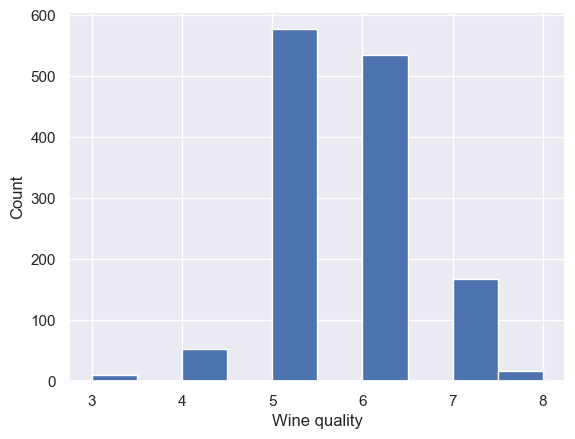

In [7]:
sns.set()
data.quality.hist()
plt.xlabel('Wine quality')
plt.ylabel('Count')

The majority of wines are rated between 5 and 6, in the middle of the quality scale.

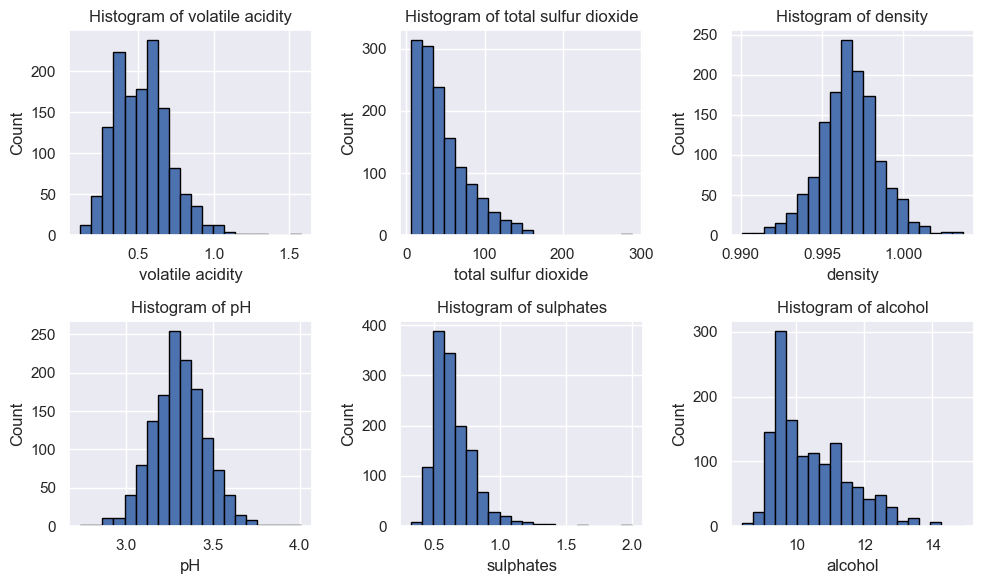

In [8]:
features = ['volatile acidity','total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

plt.figure(figsize=(10, 6))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)  
    plt.hist(data[feature], bins=20, edgecolor='black')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'Histogram of {feature}')
    plt.grid(True)

plt.tight_layout()
plt.show()

Generally, density and pH are symmetrically distributed while others are right skewed.

## 3.2.Relations Between Variables
Subsequently, we are going to find relations between variables.

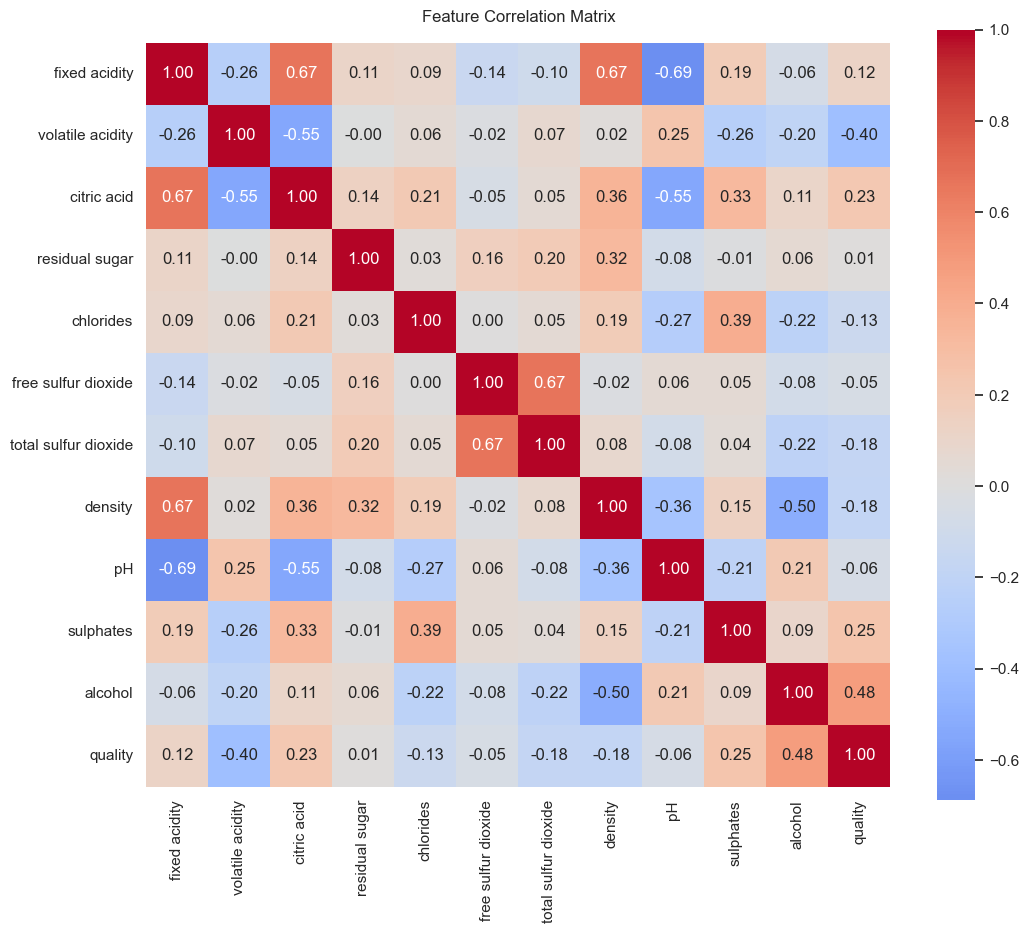

In [9]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), 
            annot=True,        
            fmt='.2f',         
            cmap='coolwarm',   
            center=0,          
            square=True)    
   
plt.title('Feature Correlation Matrix', pad=15)
plt.show()

According to the correlation matrix, it seems alcohol, volatile acidity, sulphates, citric acid are highly more related to quality compared to other variables. 
## 3.3.Basic Visualization
First we make some boxplots to see if wine quality varies on some variables.

/var/folders/vp/q1vktd2154l3wrmbvcp5r5vh0000gn/T/ipykernel_12513/3954781044.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y=column, data=data,palette='Set3')
/var/folders/vp/q1vktd2154l3wrmbvcp5r5vh0000gn/T/ipykernel_12513/3954781044.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y=column, data=data,palette='Set3')
/var/folders/vp/q1vktd2154l3wrmbvcp5r5vh0000gn/T/ipykernel_12513/3954781044.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y=column, data=data,palette='Set3')
/var/folders/vp/

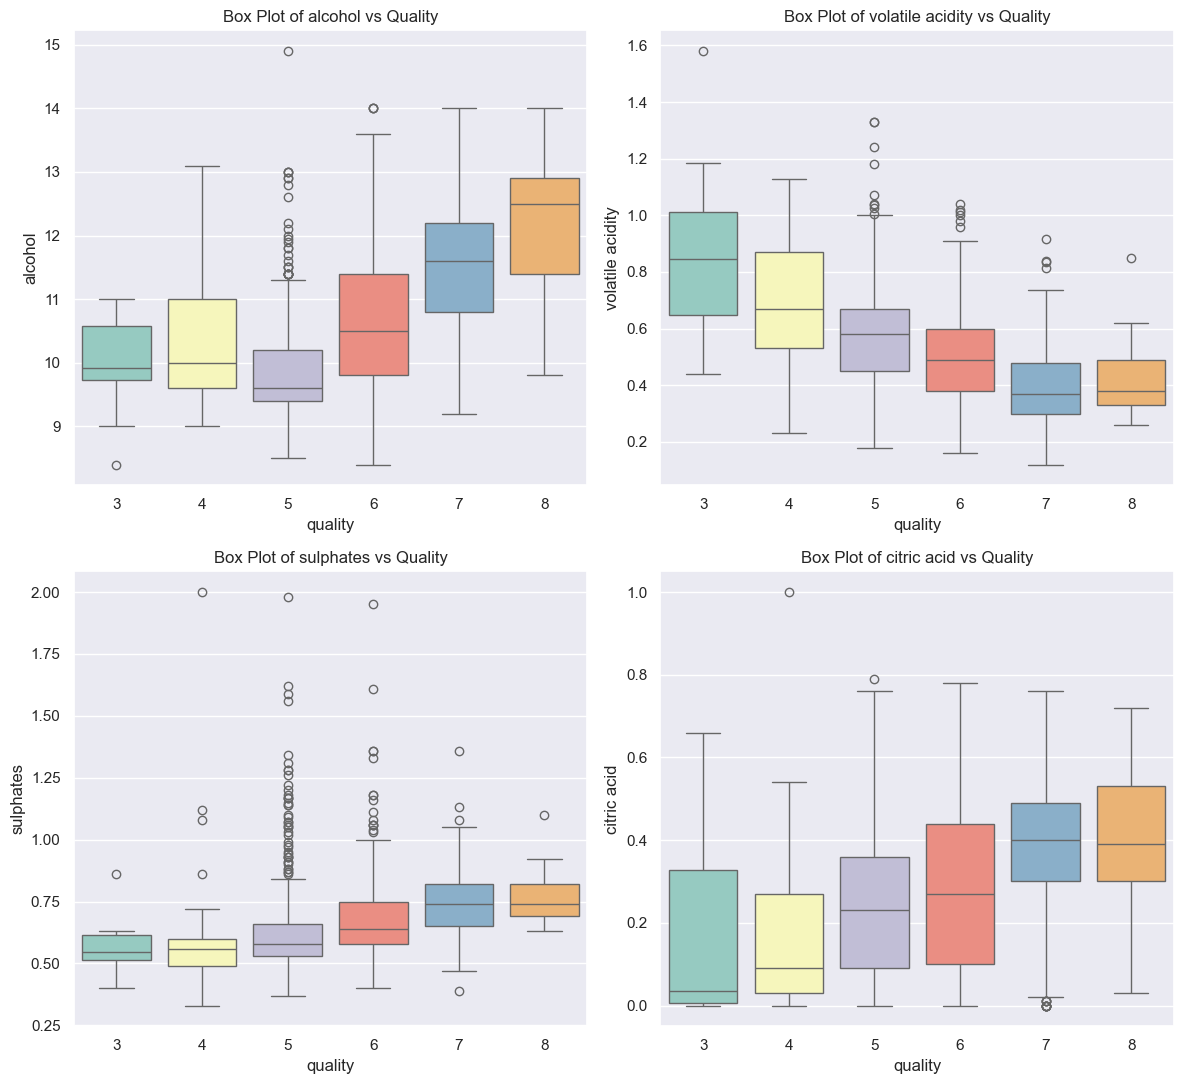

In [10]:
plt.figure(figsize=(12,11))
columns = ['alcohol', 'volatile acidity', 'sulphates', 'citric acid']
for i, column in enumerate(columns, 1):
    plt.subplot((len(columns) + 1) // 2, 2, i)
    sns.boxplot(x='quality', y=column, data=data,palette='Set3')
    plt.title(f'Box Plot of {column} vs Quality')

plt.tight_layout()
plt.show()

Generally we can see that high quality implies higher alcohol, sulphates, citric acid while lower volatile acidity, in spite of some outliers. Next step we try to spread 2 factors in a scatter plot to see how they work together.

The reason why we choose these variables is we focus on density, which could be a critical factor for wine quality by intuition, and then we choose some highly related(to density) variables to work with it together

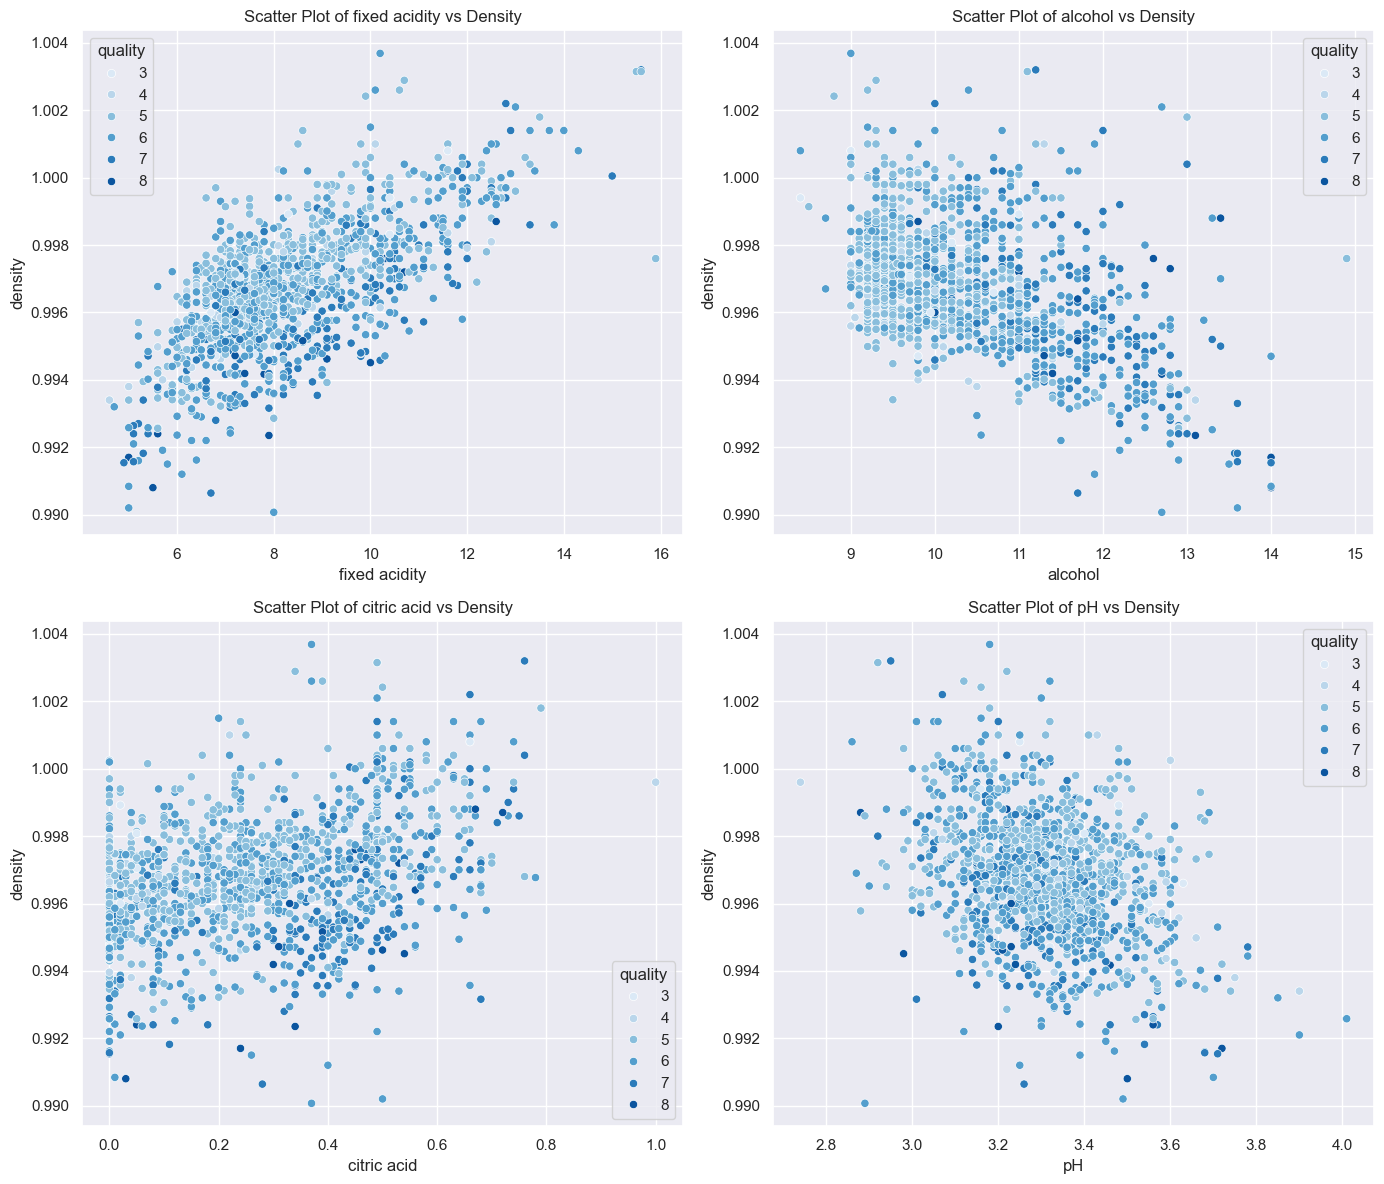

In [11]:
plt.figure(figsize=(14, 12)) 
columns = ['fixed acidity', 'alcohol', 'citric acid', 'pH']

for i, column in enumerate(columns, 1):
    plt.subplot(2, 2, i) 
    sns.scatterplot(x=column, y='density', hue='quality', data=data, palette=sns.color_palette("Blues", as_cmap=False))
    plt.title(f'Scatter Plot of {column} vs Density')

plt.tight_layout() 
plt.show()

Some patterns can be found but it's still hard to say how quality differs from different properties exactly. To simplify, we will try to reduce the dimensionality of these chemical properties later on.

## 3.4. Advanced Visualization
Next, we try to make some interesting and developed plots to find more patterns.

We use a standardized radar plot to compare the feature pattern across different qualities using standardized measurements.

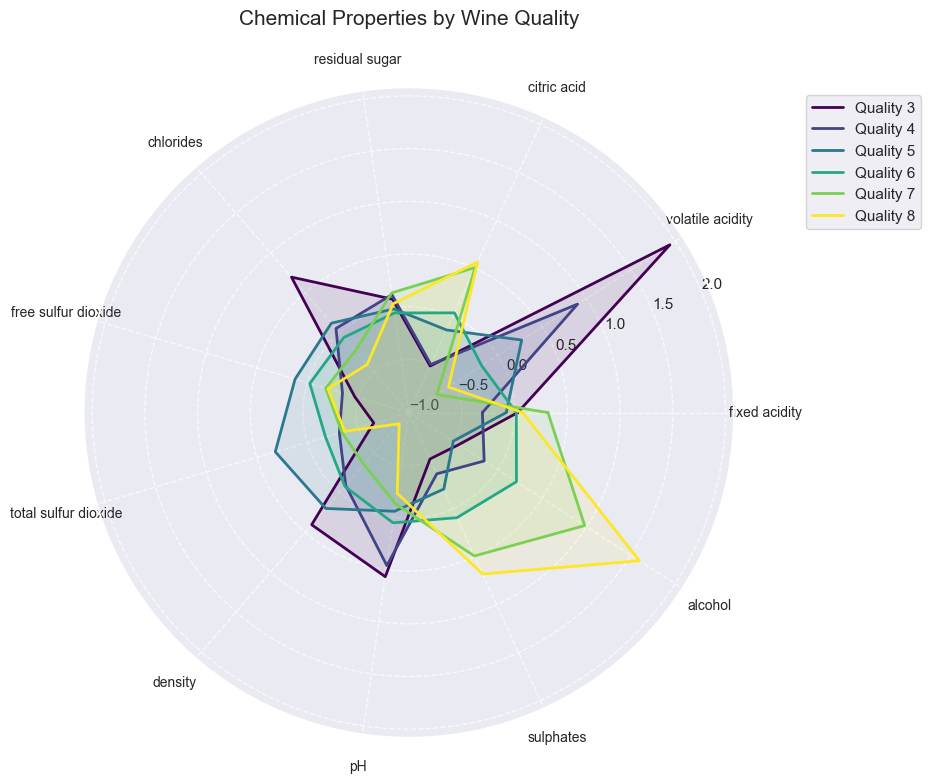

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features = data.drop('quality', axis=1).columns
data_scaled = pd.DataFrame(
    scaler.fit_transform(data[features]),
    columns=features,
    index=data.index
)

quality_means = {}
for quality in sorted(data['quality'].unique()):
    quality_means[quality] = data_scaled[data['quality'] == quality].mean()
angles = np.linspace(0, 2*np.pi, len(features), endpoint=False)

# Radar Plot
plt.figure(figsize=(12, 8))
ax = plt.subplot(111, projection='polar')


colors = plt.cm.viridis(np.linspace(0, 1, len(quality_means)))
for (quality, feature), color in zip(quality_means.items(), colors):
    values = feature.values
    values = np.concatenate((values, [values[0]]))  
    angles_plot = np.concatenate((angles, [angles[0]]))  
    ax.plot(angles_plot, values, color=color, linewidth=2, label=f'Quality {quality}')
    ax.fill(angles_plot, values, color=color, alpha=0.1)  


ax.set_xticks(angles)
ax.set_xticklabels(features, size=10)
ax.tick_params(axis='x', pad=10)  
ax.grid(True, linestyle='--', alpha=0.7)  
plt.title('Chemical Properties by Wine Quality', size=15, pad=20)
plt.legend(bbox_to_anchor=(1.3, 1), loc='upper right')

plt.tight_layout()
plt.show()


The radar plot reveals that higher quality wines have a higher alcohol content and lower volatile acidity, while the other chemical properties exhibit rather small variations across the different levels of quality.

In addition, we make a bubble plot to display relationships between alcohol, volatile acidity, and sulphates.


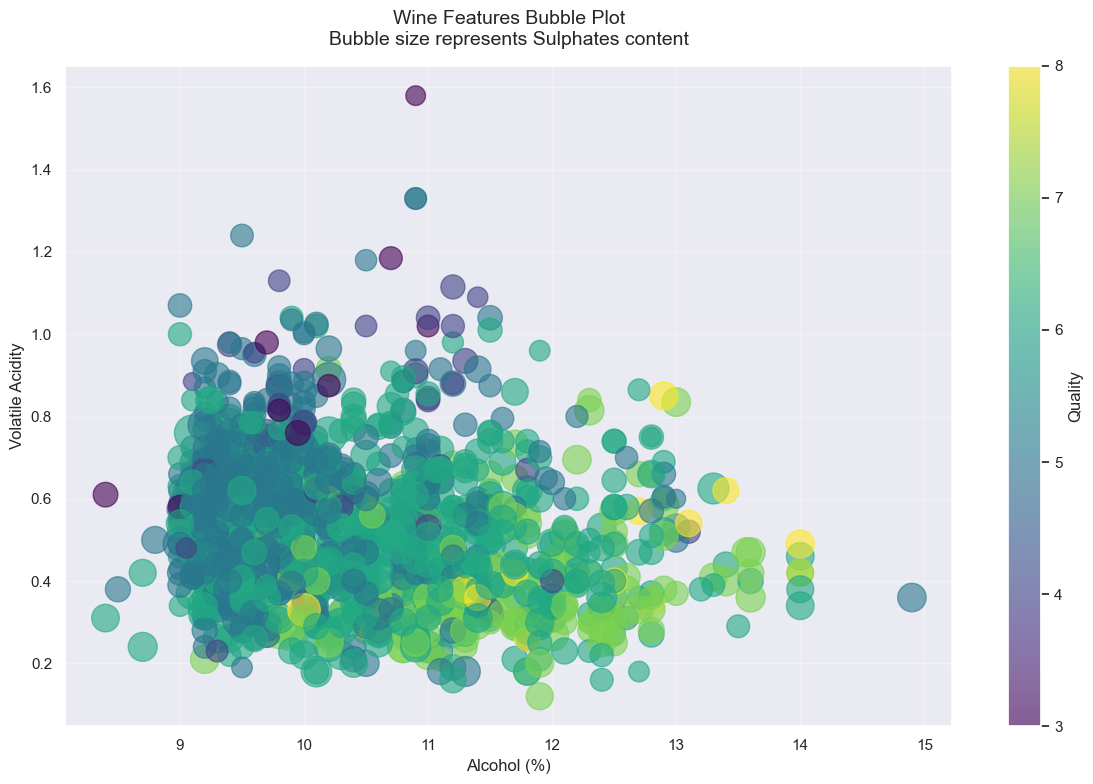

In [13]:
# Bubble Plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(data['alcohol'], 
                     data['volatile acidity'],
                     s=data['sulphates']*500,  
                     c=data['quality'],        
                     cmap='viridis',
                     alpha=0.6)                


plt.colorbar(scatter, label='Quality')
plt.xlabel('Alcohol (%)', size=12)
plt.ylabel('Volatile Acidity', size=12)
plt.title('Wine Features Bubble Plot\nBubble size represents Sulphates content', 
          pad=15, size=14)


plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

The good quality wines cluster in the high alcohol, low volatile acidity, and high sulphates regions with few outliers in the less expected regions.

Another dendrogram of clustering was used too, showing how the wine features cluster into their respective correlations.

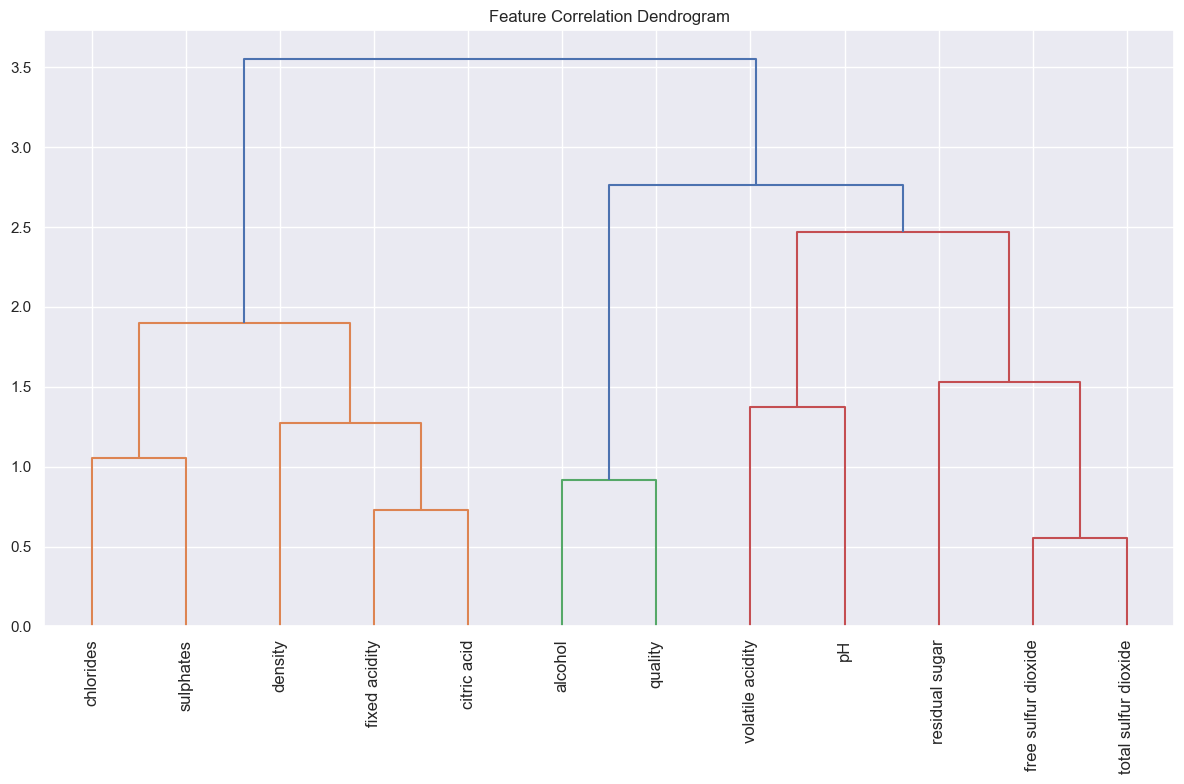

In [14]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist


feature_correlations = data.corr()
linkage = hierarchy.linkage(pdist(feature_correlations), method='ward')

# Dendrogram
plt.figure(figsize=(12, 8))
dendrogram = hierarchy.dendrogram(linkage, 
                                labels=feature_correlations.index,
                                leaf_rotation=90,
                                leaf_font_size=12)
plt.title('Feature Correlation Dendrogram')
plt.tight_layout()
plt.show()

Features fall automatically into two major clusters: one related to acidity, pH, fixed acidity, and the other to alcohol content and density. This insigh twill be enhanced later on by feature engineering and PCA.


# 4. Supervised Learning

Task: Wine Quality Prediction. In this case, we choose regression instead of classification mission because quality is an ordinal data. The score here is an ordered sequence. For example, 7 is better than 6 and so on. We cannot use classification because one-hot encoding will lose this ordinal information.

This section consists three main parts:

1. **Feature Engineering**: According to domain knowledge in wine chemistry and previous founding, we perform feature engineering by including meaningful features involving an acidity score and the ratio between alcohol and density. These engineered features strive to catch important and complicated relationships between variables that are perhaps not directly available in the original features.

2. **Model Implementation**: We implement and compare four different kinds of models. Each model was trained on both the original and engineered feature sets to compare the impact of feature engineering.
 - Ridge Regression: A linear model with L2 regularization
 - Random Forest: An ensembled decision tree model
 - Support Vector Regression: A kernel-based model
- Neural Network: deep learning model
 
   

3. **Model Evaluation**: Model performance is evaluated based on:
- Train-test split to evaluate the model's performance
- Metrics such as RMSE and R²
- Cross-validation to tune the hyperparameters of Ridge Regression

## 4.1. Feature Engineering
First, we generate new features with domain knowledge on wine chemistry that captures complex relationships in our dataset. These features engineered combine original features in meaningful ways that can potentially improve model performances.

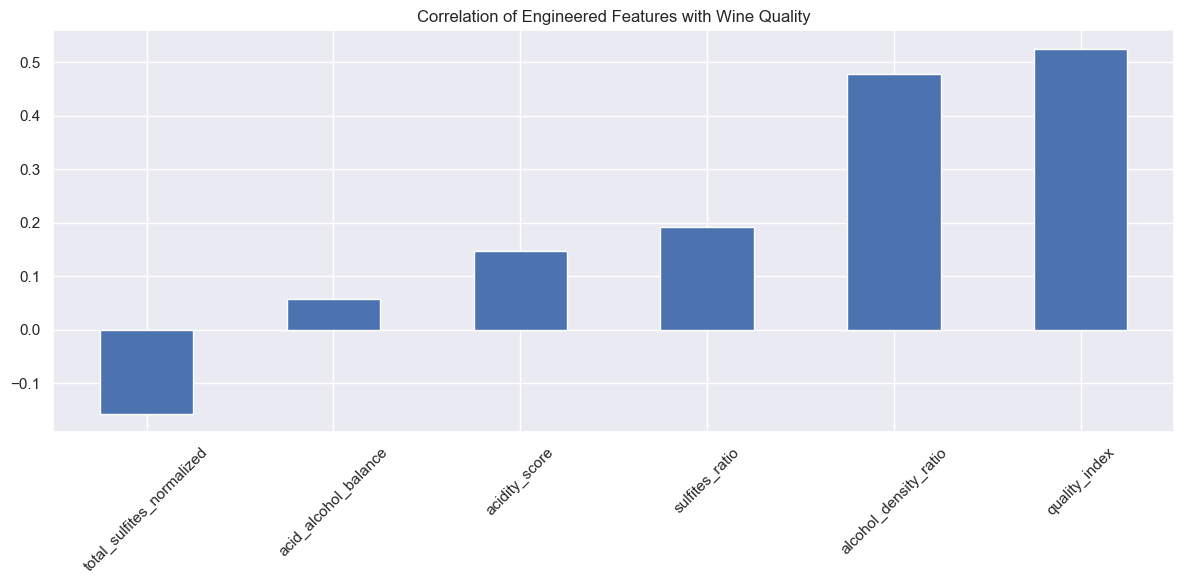

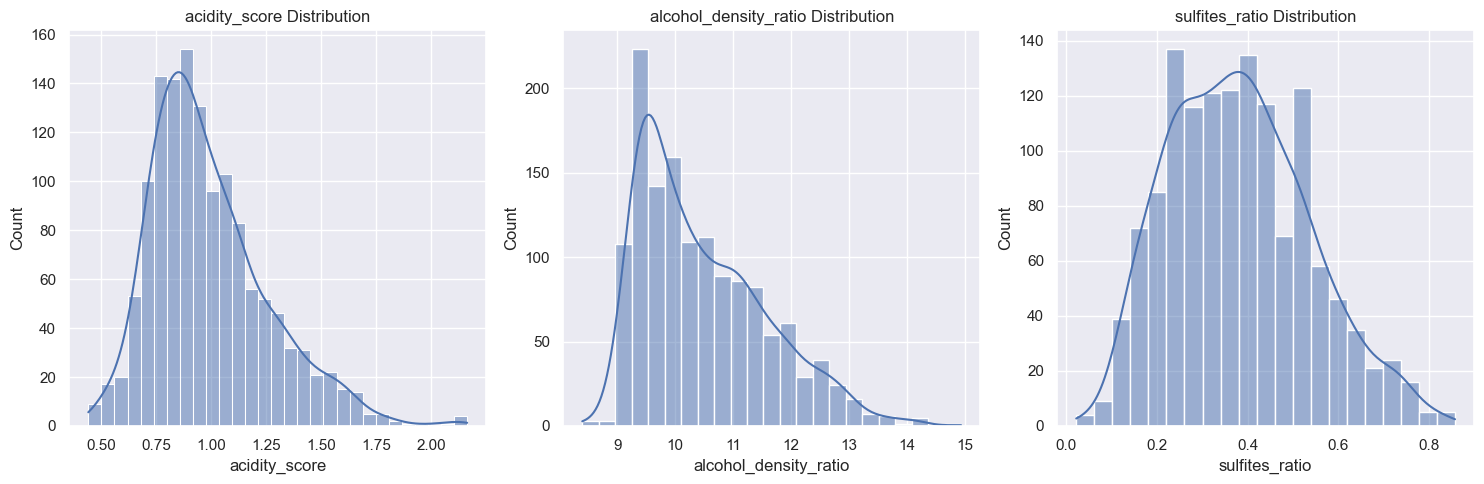


Descriptive Statistics of Engineered Features:
       acidity_score  alcohol_density_ratio  sulfites_ratio  \
count       1359.000               1359.000        1359.000   
mean           0.991                 10.468           0.381   
std            0.266                  1.097           0.155   
min            0.443                  8.393           0.023   
25%            0.799                  9.533           0.260   
50%            0.939                 10.206           0.375   
75%            1.132                 11.154           0.484   
max            2.163                 14.936           0.857   

       total_sulfites_normalized  acid_alcohol_balance  quality_index  
count                   1359.000              1359.000       1359.000  
mean                      62.922              1018.140          3.166  
std                       41.254               900.284          0.344  
min                        9.028                62.416          2.526  
25%                     

In [15]:

def create_engineered_features(data):
    df = data.copy()
    
    # Acidity-related score
    # Weighted combination of acids normalized by pH
    df['acidity_score'] = (df['fixed acidity'] * 0.4 +
                          df['volatile acidity'] * (-0.3) +
                          df['citric acid'] * 0.3) / df['pH']
    
    #  Alcohol-density relationship
    df['alcohol_density_ratio'] = df['alcohol'] / df['density']
    
    #  Sulfites measurements
    # Ratio between free and total sulfur dioxide indicates preservation quality
    df['sulfites_ratio'] = df['free sulfur dioxide'] / df['total sulfur dioxide']
    # Normalize total sulfites
    df['total_sulfites_normalized'] = (df['free sulfur dioxide'] + 
                                     df['total sulfur dioxide']) / df['density']
    
    #  Balance indicator
    # Combines key quality factors: sulfites, alcohol, acidity, and density
    df['acid_alcohol_balance'] = (df['total sulfur dioxide'] * df['alcohol']) / \
                                (df['volatile acidity'] * df['density'])
    
    # Quality composite index
    # Weighted combination of known quality indicators
    df['quality_index'] = (df['alcohol'] * 0.3 + 
                          df['sulphates'] * 0.2 -
                          df['volatile acidity'] * 0.2) * \
                          (1 / df['density'])

    return df


data_engineered = create_engineered_features(data)

# 1. Correlation
new_features = ['acidity_score', 'alcohol_density_ratio', 'sulfites_ratio',
                'total_sulfites_normalized', 'acid_alcohol_balance', 'quality_index']

plt.figure(figsize=(12, 6))
correlations = data_engineered[new_features + ['quality']].corr()['quality'][:-1]
correlations.sort_values().plot(kind='bar')
plt.title('Correlation of Engineered Features with Wine Quality')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Visualize 
plt.figure(figsize=(15, 5))
for i, feature in enumerate(new_features[:3], 1):
    plt.subplot(1, 3, i)
    sns.histplot(data_engineered[feature], kde=True)
    plt.title(f'{feature} Distribution')
plt.tight_layout()
plt.show()

# 3. Display
print("\nDescriptive Statistics of Engineered Features:")
print(data_engineered[new_features].describe().round(3))

original_features = ['alcohol', 'volatile acidity', 'sulphates', 'pH', 
                    'fixed acidity', 'citric acid', 'density', 
                    'free sulfur dioxide', 'total sulfur dioxide']

engineered_features = ['alcohol', 'volatile acidity', 'sulphates', 
                      'acidity_score', 'alcohol_density_ratio', 'sulfites_ratio',
                      'quality_index']

## 4.2. Model Implementation
### 4.2.1 Ridge Regression

Now we will have our sole linear model, which incorporates training with L2 regularization. For implementation, we find the best alpha parameter by cross-validation; standardize the features in both feature sets.

First, we split the data into training and testing sets, and then standardize the features for both feature sets.


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def prepare_data_splits():
    splits = {}
    
    for features, feature_type in [(original_features, "Original"), 
                                 (engineered_features, "Engineered")]:
        
        X = data_engineered[features]
        y = data_engineered['quality']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        splits[feature_type] = {
            'X_train': X_train_scaled,
            'X_test': X_test_scaled,
            'y_train': y_train,
            'y_test': y_test,
            'features': features  
        }
    
    return splits

data_splits = prepare_data_splits()

Then we implement Ridge Regression.

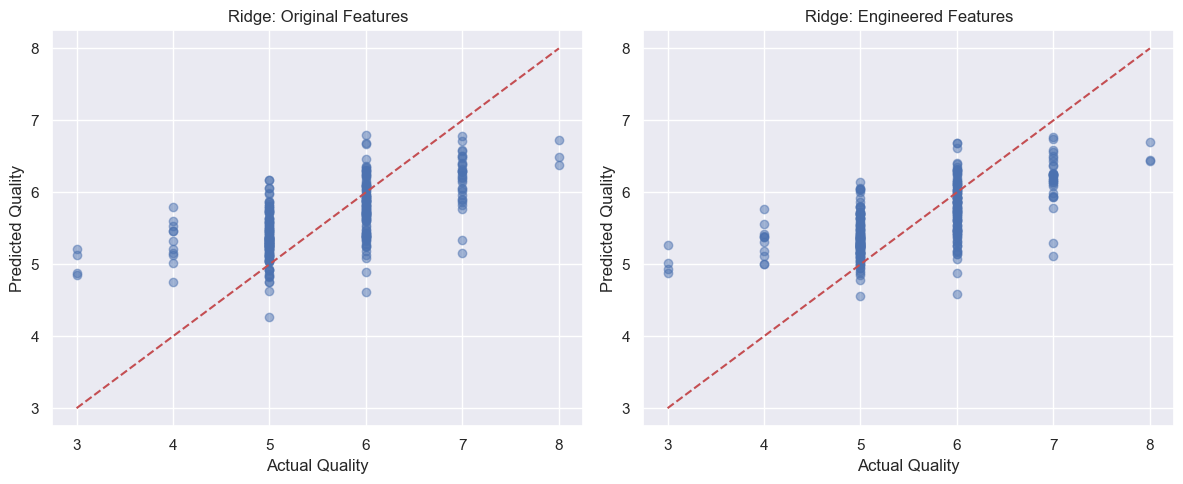


Ridge Regression Results:

Ridge (Original):
RMSE: 0.6520
R2: 0.3998
Best Alpha: 10

Ridge (Engineered):
RMSE: 0.6476
R2: 0.4080
Best Alpha: 100


In [17]:
#Skip ordinary linear regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

def implement_ridge(data_splits):
    results = []
    alphas = [0.1, 1, 10, 100, 500, 1000]
    
    for feature_type in ["Original", "Engineered"]:
        
        X_train = data_splits[feature_type]['X_train']
        X_test = data_splits[feature_type]['X_test']
        y_train = data_splits[feature_type]['y_train']
        y_test = data_splits[feature_type]['y_test']
        
        # Find best alpha through c-v
        best_alpha = None
        best_score = float('-inf')
        
        for alpha in alphas:
            ridge = Ridge(alpha=alpha)
            score = cross_val_score(ridge, X_train, y_train, cv=5).mean()
            if score > best_score:
                best_score = score
                best_alpha = alpha
    
        final_ridge = Ridge(alpha=best_alpha)
        final_ridge.fit(X_train, y_train)
        y_pred = final_ridge.predict(X_test)
        
        # Evaluate 
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)
        
        results.append({
            'Model': f'Ridge ({feature_type})',
            'RMSE': rmse,
            'R2': r2,
            'Best Alpha': best_alpha,
            'Feature Set': feature_type,
            'Predictions': y_pred,
            'Actuals': y_test
        })
    
    # Visualization
    plt.figure(figsize=(12, 5))
    for i, result in enumerate(results):
        plt.subplot(1, 2, i+1)
        plt.scatter(result['Actuals'], result['Predictions'], alpha=0.5)
        plt.plot([result['Actuals'].min(), result['Actuals'].max()], 
                 [result['Actuals'].min(), result['Actuals'].max()], 'r--')
        plt.title(f"Ridge: {result['Feature Set']} Features")
        plt.xlabel('Actual Quality')
        plt.ylabel('Predicted Quality')
    
    plt.tight_layout()
    plt.show()
    
    return results

ridge_results = implement_ridge(data_splits)

print("\nRidge Regression Results:")
for result in ridge_results:
    print(f"\n{result['Model']}:")
    print(f"RMSE: {result['RMSE']:.4f}")
    print(f"R2: {result['R2']:.4f}")
    print(f"Best Alpha: {result['Best Alpha']}")

It can be observed from this that Ridge did equally well for the original and engineered feature sets: RMSE ≈ 0.65, R² ≈ 0.40, while it required heavy regularization: alpha： 10～100. These moderate R² scores might suggest that wine quality is not well described by a linear relationship and call for nonlinear models.
### 4.2.2 Random Forest

Then, we would run a Random Forest model that captures complex nonlinear relationships. The ensembled method combines several decision trees together to achieve better prediction and analyze feature importance.

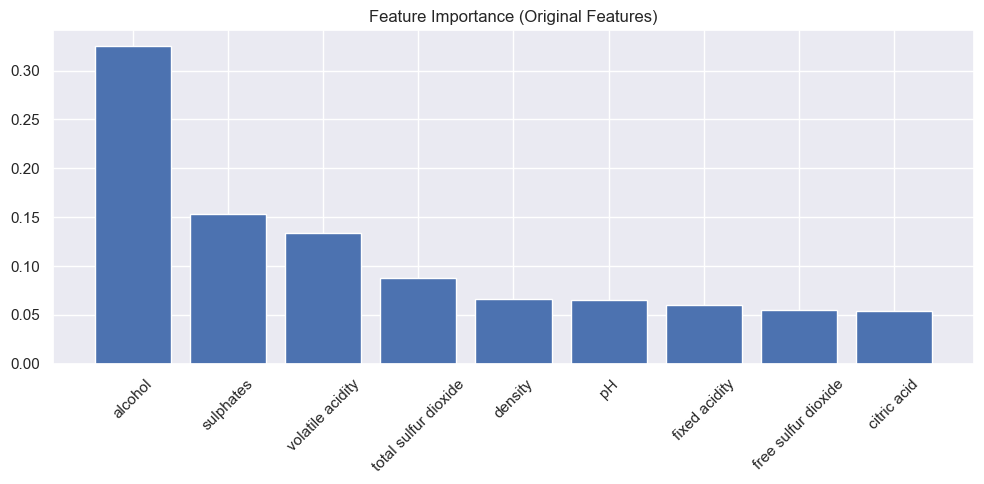

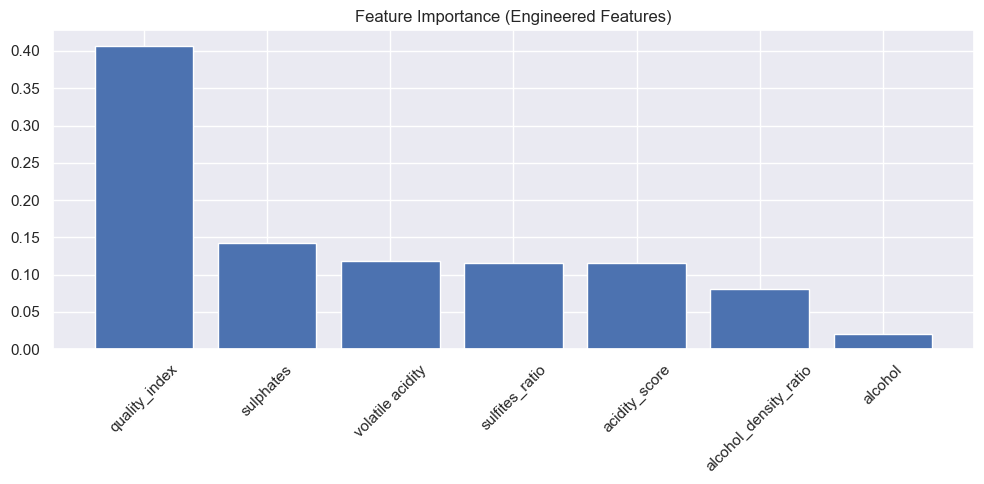

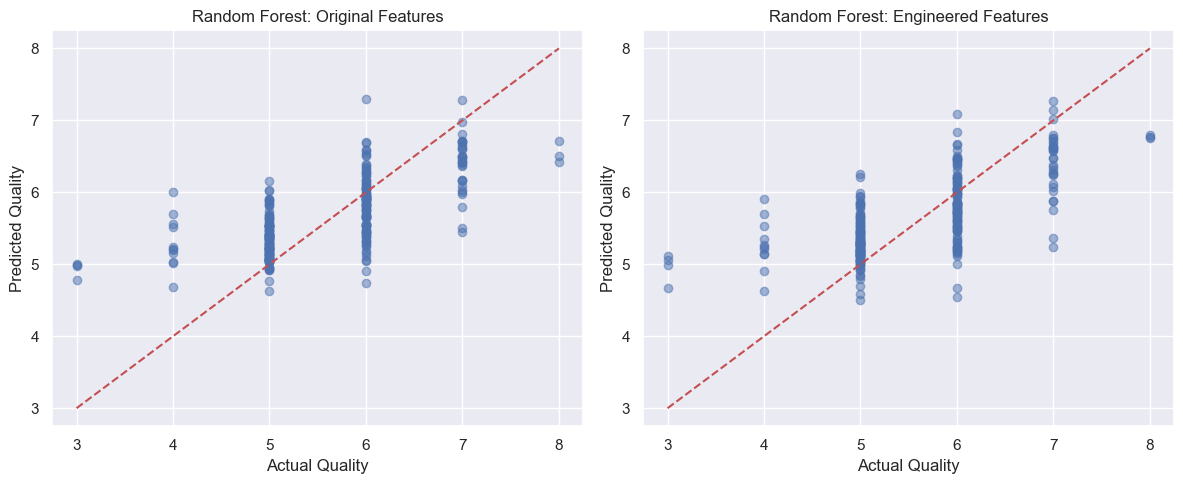


Random Forest Results:

Random Forest (Original):
RMSE: 0.6137
R2: 0.4684

Top 3 Important Features:
            feature  importance
0           alcohol    0.324884
2         sulphates    0.153330
1  volatile acidity    0.133307

Random Forest (Engineered):
RMSE: 0.6206
R2: 0.4563

Top 3 Important Features:
            feature  importance
6     quality_index    0.407175
2         sulphates    0.141831
1  volatile acidity    0.118000


In [18]:
from sklearn.ensemble import RandomForestRegressor
def implement_random_forest(data_splits):
    results = []
    
    for feature_type in ["Original", "Engineered"]:
        
        X_train = data_splits[feature_type]['X_train']
        X_test = data_splits[feature_type]['X_test']
        y_train = data_splits[feature_type]['y_train']
        y_test = data_splits[feature_type]['y_test']
        features = data_splits[feature_type]['features']  
        
        rf = RandomForestRegressor(n_estimators=100, 
                                 max_depth=10,
                                 min_samples_split=5,
                                 random_state=42)
        
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)
        # Evaluate 
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)
        # Feature importance
        importance = pd.DataFrame({
            'feature': features,
            'importance': rf.feature_importances_
        }).sort_values('importance', ascending=False)
        
        results.append({
            'Model': f'Random Forest ({feature_type})',
            'RMSE': rmse,
            'R2': r2,
            'Feature Set': feature_type,
            'Predictions': y_pred,
            'Actuals': y_test,
            'Importance': importance
        })
        
        # Plot feature importance
        plt.figure(figsize=(10, 5))
        plt.bar(importance['feature'], importance['importance'])
        plt.xticks(rotation=45)
        plt.title(f'Feature Importance ({feature_type} Features)')
        plt.tight_layout()
        plt.show()
    
    # predictions vs actuals
    plt.figure(figsize=(12, 5))
    for i, result in enumerate(results):
        plt.subplot(1, 2, i+1)
        plt.scatter(result['Actuals'], result['Predictions'], alpha=0.5)
        plt.plot([result['Actuals'].min(), result['Actuals'].max()], 
                 [result['Actuals'].min(), result['Actuals'].max()], 'r--')
        plt.title(f"Random Forest: {result['Feature Set']} Features")
        plt.xlabel('Actual Quality')
        plt.ylabel('Predicted Quality')
    
    plt.tight_layout()
    plt.show()
    
    return results

rf_results = implement_random_forest(data_splits)
print("\nRandom Forest Results:")
for result in rf_results:
    print(f"\n{result['Model']}:")
    print(f"RMSE: {result['RMSE']:.4f}")
    print(f"R2: {result['R2']:.4f}")
    print("\nTop 3 Important Features:")
    print(result['Importance'].head(3))

Random Forest Generalizes better with original features, RMSE:0.61, R²:0.47 than engineered features. Whereas, Alcohol, sulphates and volatile acidity are the consistently important predictors in original feature set, in engineered feature set the derived quality_index becomes the dominant predictor.
### 4.2.3 Support Vector Regression

Furthermore,we implement SVR with an RBF kernel to capture non-linear relationships in the data. This kernel-based method can model complex patterns by implicitly mapping features to a higher-dimensional space. 

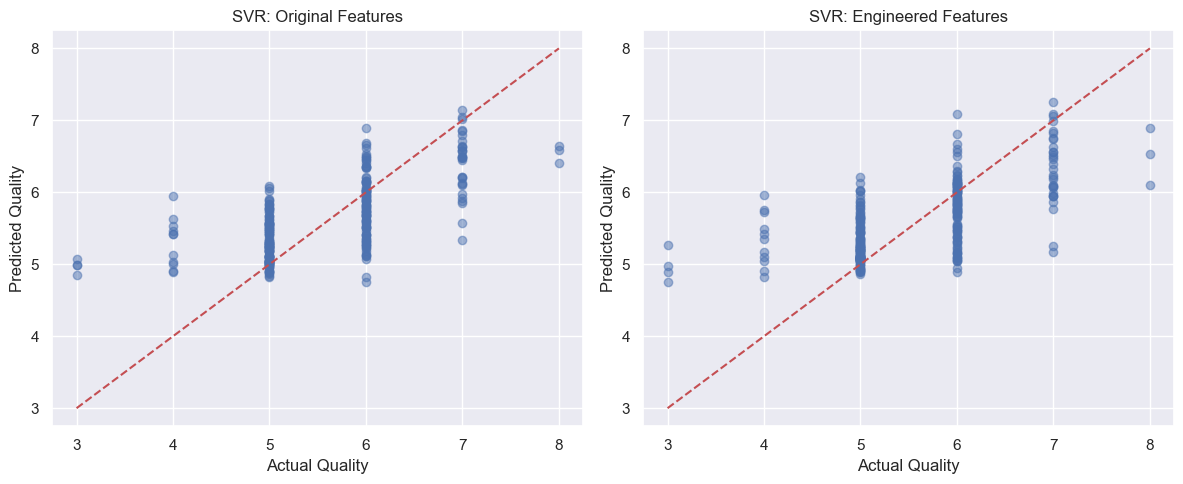


SVR Results:

SVR (Original):
RMSE: 0.6203
R2: 0.4569

SVR (Engineered):
RMSE: 0.6406
R2: 0.4207


In [19]:
from sklearn.svm import SVR
def implement_svr(data_splits):
    results = []
    
    for feature_type in ["Original", "Engineered"]:
        
        X_train = data_splits[feature_type]['X_train']
        X_test = data_splits[feature_type]['X_test']
        y_train = data_splits[feature_type]['y_train']
        y_test = data_splits[feature_type]['y_test']
        
        # Initialize and train model
        svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)
        svr.fit(X_train, y_train)
        y_pred = svr.predict(X_test)
        
        # Calculate metrics
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)
        
        results.append({
            'Model': f'SVR ({feature_type})',
            'RMSE': rmse,
            'R2': r2,
            'Feature Set': feature_type,
            'Predictions': y_pred,
            'Actuals': y_test
        })
    
    # predictions vs actuals
    plt.figure(figsize=(12, 5))
    for i, result in enumerate(results):
        plt.subplot(1, 2, i+1)
        plt.scatter(result['Actuals'], result['Predictions'], alpha=0.5)
        plt.plot([result['Actuals'].min(), result['Actuals'].max()], 
                 [result['Actuals'].min(), result['Actuals'].max()], 'r--')
        plt.title(f"SVR: {result['Feature Set']} Features")
        plt.xlabel('Actual Quality')
        plt.ylabel('Predicted Quality')
    
    plt.tight_layout()
    plt.show()
    return results


svr_results = implement_svr(data_splits)

print("\nSVR Results:")
for result in svr_results:
    print(f"\n{result['Model']}:")
    print(f"RMSE: {result['RMSE']:.4f}")
    print(f"R2: {result['R2']:.4f}")

SVR with original features gives a moderate performance: RMSE is 0.62 and R² is 0.46, outperforming the engineered features. While it outperforms the results from Ridge Regression, the performance is still below Random Forest, indicating that tree-based methods better capture the non-linear relationships in wine quality.
### 4.2.4 Neural Network

Finally, a neural network model, which furthers the nonlinear modeling capability is implemented. We will develop and train the model using PyTorch, standardize the features of the data.

Epoch [20/100], Test Loss: 0.5427
Epoch [40/100], Test Loss: 0.4185
Epoch [60/100], Test Loss: 0.4213
Epoch [80/100], Test Loss: 0.3860
Epoch [100/100], Test Loss: 0.4018
Epoch [20/100], Test Loss: 0.4828
Epoch [40/100], Test Loss: 0.4174
Epoch [60/100], Test Loss: 0.4064
Epoch [80/100], Test Loss: 0.4068
Epoch [100/100], Test Loss: 0.4001


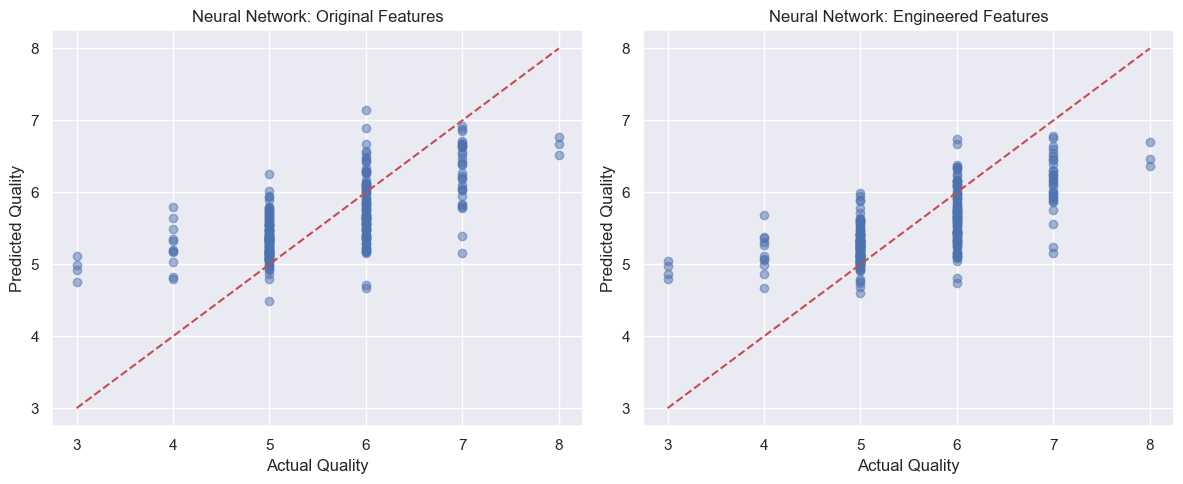


Neural Network Results:

Neural Network (Original):
RMSE: 0.6317
R2: 0.4367

Neural Network (Engineered):
RMSE: 0.6262
R2: 0.4464


In [20]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import mean_squared_error, r2_score

class WineDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.FloatTensor(X)
        self.y = torch.FloatTensor(y.values).reshape(-1, 1)
        
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Define model
class WineQualityMLP(nn.Module):
    def __init__(self, input_size):
        super(WineQualityMLP, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_size, 64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(32, 1)
        )
    
    def forward(self, x):
        return self.layers(x)

# Implementation
def implement_neural_net(data_splits):
    results = []
    
    for feature_type in ["Original", "Engineered"]:

        X_train = data_splits[feature_type]['X_train']
        X_test = data_splits[feature_type]['X_test']
        y_train = data_splits[feature_type]['y_train']
        y_test = data_splits[feature_type]['y_test']
        
        train_dataset = WineDataset(X_train, y_train)
        test_dataset = WineDataset(X_test, y_test)
        train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
        test_loader = DataLoader(test_dataset, batch_size=32)
        
        # Initialize model
        model = WineQualityMLP(input_size=X_train.shape[1])
        criterion = nn.MSELoss()
        optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
        
        # Training loop
        epochs = 100
        for epoch in range(epochs):
            model.train()
            for batch_X, batch_y in train_loader:
                optimizer.zero_grad()
                outputs = model(batch_X)
                loss = criterion(outputs, batch_y)
                loss.backward()
                optimizer.step()
            
            if (epoch + 1) % 20 == 0:
                model.eval()
                with torch.no_grad():
                    test_loss = 0
                    for batch_X, batch_y in test_loader:
                        outputs = model(batch_X)
                        test_loss += criterion(outputs, batch_y).item()
                print(f'Epoch [{epoch+1}/{epochs}], Test Loss: {test_loss/len(test_loader):.4f}')
        
        # Final evaluation
        model.eval()
        predictions = []
        actuals = []
        with torch.no_grad():
            for batch_X, batch_y in test_loader:
                outputs = model(batch_X)
                # Convert tensors to lists
                predictions.extend(outputs.tolist())
                actuals.extend(batch_y.tolist())
        
        # Convert lists to numpy arrays
        predictions = np.array(predictions).flatten()
        actuals = np.array(actuals).flatten()
        
        # Evaluate model performance
        rmse = np.sqrt(mean_squared_error(actuals, predictions))
        r2 = r2_score(actuals, predictions)
        
        results.append({
            'Model': f'Neural Network ({feature_type})',
            'RMSE': rmse,
            'R2': r2,
            'Feature Set': feature_type,
            'Predictions': predictions,
            'Actuals': actuals
        })
    
    # Plot predictions vs actuals
    plt.figure(figsize=(12, 5))
    for i, result in enumerate(results):
        plt.subplot(1, 2, i+1)
        plt.scatter(result['Actuals'], result['Predictions'], alpha=0.5)
        plt.plot([min(result['Actuals']), max(result['Actuals'])], 
                 [min(result['Actuals']), max(result['Actuals'])], 'r--')
        plt.title(f"Neural Network: {result['Feature Set']} Features")
        plt.xlabel('Actual Quality')
        plt.ylabel('Predicted Quality')
    
    plt.tight_layout()
    plt.show()
    
    return results

nn_results = implement_neural_net(data_splits)
print("\nNeural Network Results:")
for result in nn_results:
    print(f"\n{result['Model']}:")
    print(f"RMSE: {result['RMSE']:.4f}")
    print(f"R2: {result['R2']:.4f}")

Neural Network performance is still moderate, with the engineered features having a better result than the original one. RMSE: 0.63 and R²: 0.45. Noticeably, this is the only model where engineered features work better, although its overall performance stays behind Random Forest.

## 4.3 Model Evaluation
Now we compare the performance of all four models.

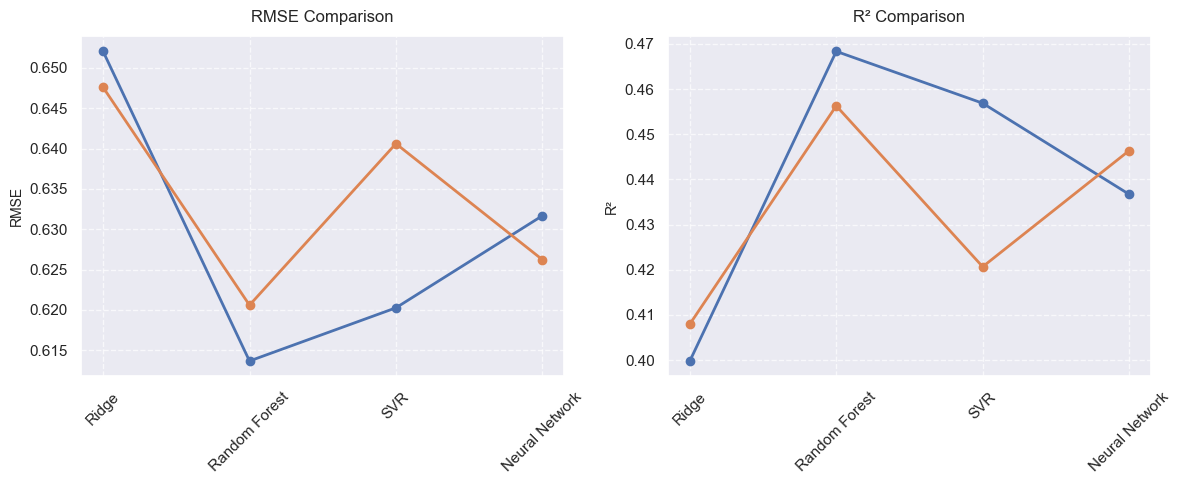


Model Performance Comparison:
                      Model Feature Set     RMSE       R2
           Ridge (Original)    Original 0.652039 0.399801
         Ridge (Engineered)  Engineered 0.647583 0.407976
   Random Forest (Original)    Original 0.613672 0.468356
 Random Forest (Engineered)  Engineered 0.620592 0.456298
             SVR (Original)    Original 0.620261 0.456878
           SVR (Engineered)  Engineered 0.640602 0.420672
  Neural Network (Original)    Original 0.631669 0.436716
Neural Network (Engineered)  Engineered 0.626232 0.446371


In [21]:
comparison_df = pd.DataFrame([
    *ridge_results,
    *rf_results,
    *svr_results,
    *nn_results
])

plt.figure(figsize=(12, 5))

# RMSE comparison
plt.subplot(1, 2, 1)
for feature_set in ['Original', 'Engineered']:
    results = comparison_df[comparison_df['Feature Set'] == feature_set]
    plt.plot(results['Model'].str.split('(').str[0].str.strip(), 
             results['RMSE'], 
             marker='o', 
             label=feature_set,
             linewidth=2)
plt.xticks(rotation=45)
plt.title('RMSE Comparison', size=12, pad=10)
plt.ylabel('RMSE', size=10)
plt.grid(True, linestyle='--', alpha=0.7)

# R2 comparison
plt.subplot(1, 2, 2)
for feature_set in ['Original', 'Engineered']:
    results = comparison_df[comparison_df['Feature Set'] == feature_set]
    plt.plot(results['Model'].str.split('(').str[0].str.strip(), 
             results['R2'], 
             marker='o', 
             label=feature_set,
             linewidth=2)
plt.xticks(rotation=45)
plt.title('R² Comparison', size=12, pad=10)
plt.ylabel('R²', size=10)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

print("\nModel Performance Comparison:")
print(comparison_df[['Model', 'Feature Set', 'RMSE', 'R2']].to_string(index=False))


 We can see Random Forest with original features performs the best, followed by SVR. And overall, original features perform better than engineered features except in Neural Network.

All models had performance no greater than R² < 0.50 across the board, suggesting that the quality of wine is still difficult to predict due to the nature of a discrete variable. However, the special scoring system of a categorical variable also accounted for this bad performance.

# 5. Unsupervised Learning
We are going to utilize two dimensionality reduction methods: PCA and autoencoder in this unsupervised learning task.

PCA focuses on the linear relationship and brings interpretable contributions of features, whereas autoencoder captures more complex, nonlinear patterns in chemical properties. Both methods can help us understand the structure that underlies wine characteristics.

## 5.1 PCA
PCA is used here to reduce the dimensionality of wine chemical features without any loss of important patterns. As an unsupervised learning method, it provides insight into the major components responsible for the variation in characteristics of wines and give information about the true structure of the data.

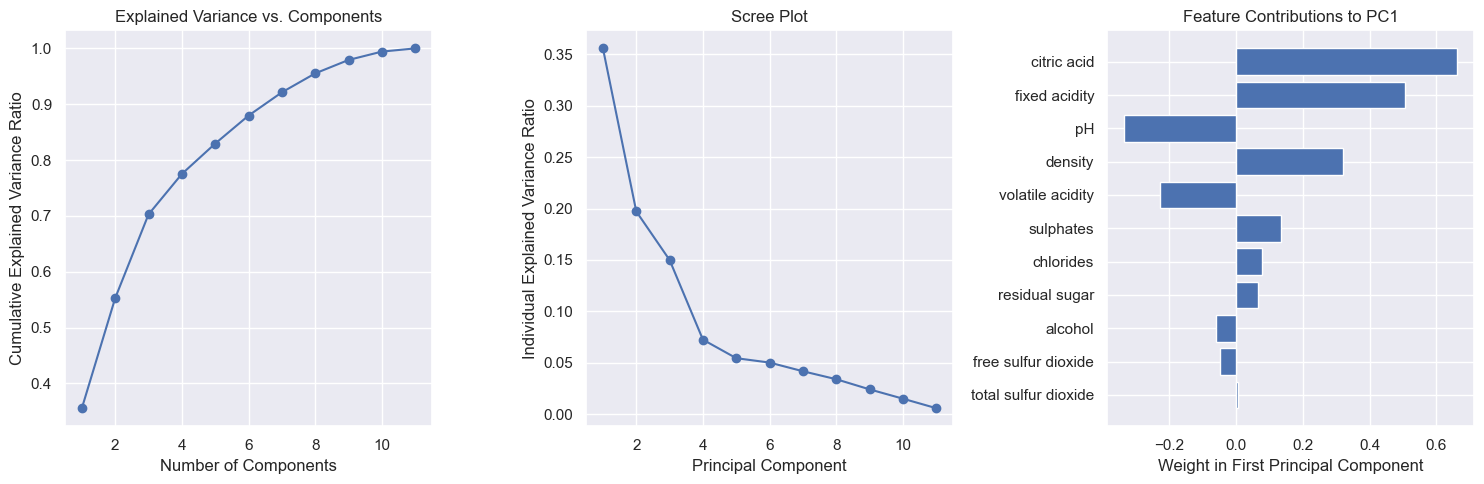


Explained variance ratio by components:
      Individual  Cumulative
PC1        0.356       0.356
PC2        0.197       0.553
PC3        0.150       0.703
PC4        0.072       0.775
PC5        0.054       0.830
PC6        0.050       0.880
PC7        0.042       0.921
PC8        0.034       0.955
PC9        0.024       0.979
PC10       0.015       0.994
PC11       0.006       1.000

Top 5 contributing features to PC1:
citric acid         0.663
fixed acidity       0.506
pH                 -0.336
density             0.321
volatile acidity   -0.229
Name: Weight, dtype: float64

Correlation between PCs and quality:
PC1    0.070
PC2    0.098
Name: quality, dtype: float64

Shape of transformed data: (1359, 12)


In [22]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler


quality = data['quality'].copy()
X = data.drop('quality', axis=1)

# Use MinMaxScaler to standardize
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)


pc_df = pd.DataFrame(
    X_pca,
    columns=[f'PC{i+1}' for i in range(X_pca.shape[1])]
)
pc_df['quality'] = quality  

plt.figure(figsize=(15, 5))

# Plot 1: Cumulative explained variance ratio
plt.subplot(1, 3, 1)
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(cumsum) + 1), cumsum, '-o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance vs. Components')
plt.grid(True)

# Plot 2: Individual explained variance ratio
plt.subplot(1, 3, 2)
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         pca.explained_variance_ratio_, '-o')
plt.xlabel('Principal Component')
plt.ylabel('Individual Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)

# Plot 3: Feature contributions to PC1
plt.subplot(1, 3, 3)
feature_weights = pd.DataFrame(
    pca.components_[0],
    columns=['Weight'],
    index=X.columns
)
feature_weights['Abs_Weight'] = abs(feature_weights['Weight'])
feature_weights = feature_weights.sort_values('Abs_Weight', ascending=True)

plt.barh(range(len(feature_weights)), feature_weights['Weight'])
plt.yticks(range(len(feature_weights)), feature_weights.index)
plt.xlabel('Weight in First Principal Component')
plt.title('Feature Contributions to PC1')

plt.tight_layout()
plt.show()


print("\nExplained variance ratio by components:")
variance_df = pd.DataFrame({
    'Individual': pca.explained_variance_ratio_,
    'Cumulative': cumsum
}, index=[f'PC{i+1}' for i in range(len(cumsum))]).round(3)
print(variance_df)
print("\nTop 5 contributing features to PC1:")
top_features = feature_weights.nlargest(5, 'Abs_Weight')
print(top_features['Weight'].round(3))

print("\nCorrelation between PCs and quality:")
correlations = pc_df.corr()['quality'][['PC1', 'PC2']].round(3)
print(correlations)

print(f"\nShape of transformed data: {pc_df.shape}")

We can obtain the following results:
1. **Dimensionality Reduction**
   - Five principal components can explain 83.0% of total variance
   - Individual contributions: PC1 (35.6%), PC2 (19.7%), PC3 (15.0%)
   - Successfully reduced dimensions while retaining most information

2. **Feature Contributions**
   - PC1 is primarily influenced by citric acid (0.663) and fixed acidity (0.506)
   - Both PC1 and PC2 show weak correlations with quality (0.070 and 0.098 respectively)

3. **Overall Insights**
   - Strong multicollinearity exists among wine chemical properties
   - Acidity-related features dominate the primary patterns in the data
   - Five components are sufficient to capture the main chemical patterns in wine characteristics

## 5.2 Autoencoder
Autoencoder is a neural network-based technique for dimensionality reduction which learns to compress and then reconstruct data through nonlinear transformations. We design an architecture of three encoding layers with nodes of size 8, 5, and 3, respectively, symmetric decoding layers in order to learn a compressed representation of the features.


Epoch [10/100], Loss: 0.0184
Epoch [20/100], Loss: 0.0172
Epoch [30/100], Loss: 0.0123
Epoch [40/100], Loss: 0.0105
Epoch [50/100], Loss: 0.0092
Epoch [60/100], Loss: 0.0091
Epoch [70/100], Loss: 0.0090
Epoch [80/100], Loss: 0.0089
Epoch [90/100], Loss: 0.0089
Epoch [100/100], Loss: 0.0088


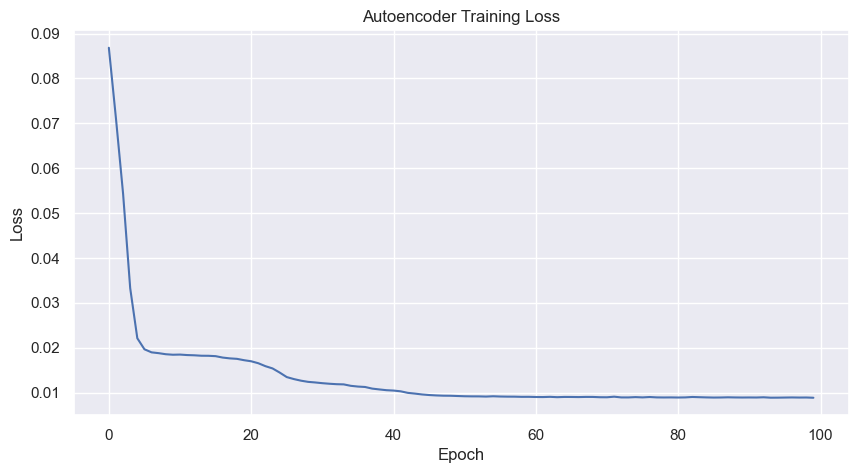

In [23]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
torch.manual_seed(1)

X_tensor = torch.FloatTensor(X_scaled)

dataset = TensorDataset(X_tensor, X_tensor)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# architecture
class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 8),
            nn.ReLU(),
            nn.Linear(8, 5),
            nn.ReLU(),
            nn.Linear(5, 3),
            nn.ReLU()
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(3, 5),
            nn.ReLU(),
            nn.Linear(5, 8),
            nn.ReLU(),
            nn.Linear(8, input_dim),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Initialize model, loss function, and optimizer
input_dim = X_scaled.shape[1]
model = Autoencoder(input_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
n_epochs = 100
losses = []

for epoch in range(n_epochs):
    epoch_loss = 0
    for data in dataloader:
        inputs, _ = data
        
        outputs = model(inputs)
        loss = criterion(outputs, inputs)
        
        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
    
    losses.append(epoch_loss / len(dataloader))
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{n_epochs}], Loss: {losses[-1]:.4f}')

plt.figure(figsize=(10, 5))
plt.plot(losses)
plt.title('Autoencoder Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

We can obtain the following results:

1. **Training Progress**
   - Loss drops rapidly to 0.0184 in first 10 epochs
   - Gradually converges to 0.009 finally

2. **Performance**
   - Very low final loss indicates excellent reconstruction
   - Successfully compressed 11 features into 3 dimensions while preserving information

3. **Key Findings**
   - Wine features can be effectively represented in a much lower dimension
   - Suggests strong relationships exist among original features


# 6. Conclusion
After all this analysis, here's what I learned:

1. **The Surprises**
- Random Forest worked way better than linear models
- Wine quality isn't as complicated as I thought - just 5 main components!

2. **What Worked**
- The autoencoder was a game-changer for understanding feature relationships
- Chemical analysis actually makes sense for initial quality screening

3. **Future Ideas**
- Would love to try this on white wines
- Maybe add price data to see quality-price relationships
